<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/hungarian/python/pandas_books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Példák könyv adatok kezelésére Pythonból

Az adatokat a Kaggle.com oldalról töltjük le. A Kaggle szabadon felhasználható adathalmazokat kínál, elsp sorban meesterséges intelligencia alkalmazásokhoz.

A letöltést a Kaggle Python API-val (kagglehub) hajtjuk végre.

In [ ]:
import kagglehub

# Download latest version
data_path = kagglehub.dataset_download("elvinrustam/books-dataset")

print("Path to dataset files:", data_path)

100%|██████████| 52.9M/52.9M [00:00<00:00, 96.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/elvinrustam/books-dataset/versions/3


Nézzük meg mit töltöttünk le. Két CSV fájlt kaptunk. A következőkben a tisztított adatokkal dolgozunk (BooksDatasetClean.csv).

In [ ]:
import glob

files = glob.glob(data_path + "/*.csv")
print("Files: ", files)

Files:  ['/root/.cache/kagglehub/datasets/elvinrustam/books-dataset/versions/3/BooksDataset.csv', '/root/.cache/kagglehub/datasets/elvinrustam/books-dataset/versions/3/BooksDatasetClean.csv']


In [ ]:
file_path = files[1]
print("File path: ", file_path)

File path:  /root/.cache/kagglehub/datasets/elvinrustam/books-dataset/versions/3/BooksDatasetClean.csv


A pandas modul segítségével töltsük be az adatokat egy pandas adatkeretbe (dataframe) és írjuk ki az első néhány sort.

In [ ]:
import pandas as pd

df = pd.read_csv(file_path)
df.head()

,Title,Authors,Description,Category,Publisher,Price Starting With ($),Publish Date (Month),Publish Date (Year)
0,Goat Brothers,"By Colton, Larry",NaN,"History , General",Doubleday,8.79,January,1993
1,The Missing Person,"By Grumbach, Doris",NaN,"Fiction , General",Putnam Pub Group,4.99,March,1981
2,Don't Eat Your Heart Out Cookbook,"By Piscatella, Joseph C.",NaN,"Cooking , Reference",Workman Pub Co,4.99,September,1983
3,When Your Corporate Umbrella Begins to Leak: A...,"By Davis, Paul D.",NaN,NaN,Natl Pr Books,4.99,April,1991
4,Amy Spangler's Breastfeeding : A Parent's Guide,"By Spangler, Amy",NaN,NaN,Amy Spangler,5.32,February,1997


Tekintsük meg az összesített adatokat a betöltött adathalmazról. Nyolc oszlopot és több mint százezer sort tartalmaz.

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103063 entries, 0 to 103062
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Title                    103063 non-null  object 
 1   Authors                  103063 non-null  object 
 2   Description              70204 non-null   object 
 3   Category                 76902 non-null   object 
 4   Publisher                103055 non-null  object 
 5   Price Starting With ($)  103063 non-null  float64
 6   Publish Date (Month)     103063 non-null  object 
 7   Publish Date (Year)      103063 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 6.3+ MB
None


További adatok a numerikus oszlopokról

In [ ]:
df.describe()

,Price Starting With ($),Publish Date (Year)
count,103063.000000,103063.000000
mean,6.777172,1994.522865
std,8.932151,13.193129
min,4.890000,1755.000000
25%,4.990000,1989.000000
50%,5.290000,1997.000000
75%,5.700000,2003.000000
max,1095.000000,2023.000000


Ellenőrizzük, hogy vannak-e kitöltetlen oszlopok. A leírás (Description) és kategória (Category) oszlopok kivételével a tisztított adatok között nincs ilyen.

In [ ]:
df.isnull().sum()

,0
Title,0
Authors,0
Description,32859
Category,26161
Publisher,8
Price Starting With ($),0
Publish Date (Month),0
Publish Date (Year),0


Ellenőrizzük a duplumokat is. Ilyen sincs.

In [ ]:
print(df.duplicated().sum())

0


Készítsünk egy grafikont a 10 leggyakrabban előforduló kategóriából. A kategória oszlop veszőkkel elválasztott felsorolást tartalmaz. A következő kódrészlet a leggyakoribb kombinációt adja.

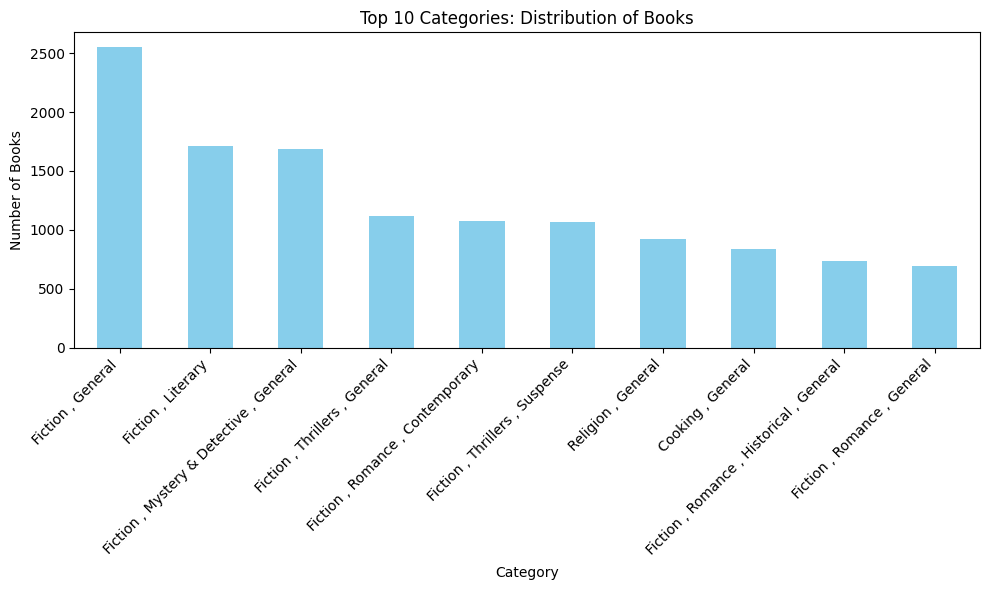

In [ ]:
from matplotlib import pyplot as plt
top_categories = df['Category'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Categories: Distribution of Books')
plt.xlabel('Category')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Kategóriák felbontása és statisztika készítés a leggyakoribb tízről. A **df["Category"]** adatkeret egy oszlopát adja, ezt egy adatsorozatnak nevezzük. A **dropna** függvény kihagyja a kitöltetlen elemeket. A **split** függvény a kategória felsorolást felbontja a vesszőknél és egy listába teszi. Az **explode** függvény a több kis listákból olyan adatsorozatot hoz létre, melyben már minden elem egy kategóriát tartalmaz. Végül a **strip** függvény a szóközöket törli az elem elején és végén.

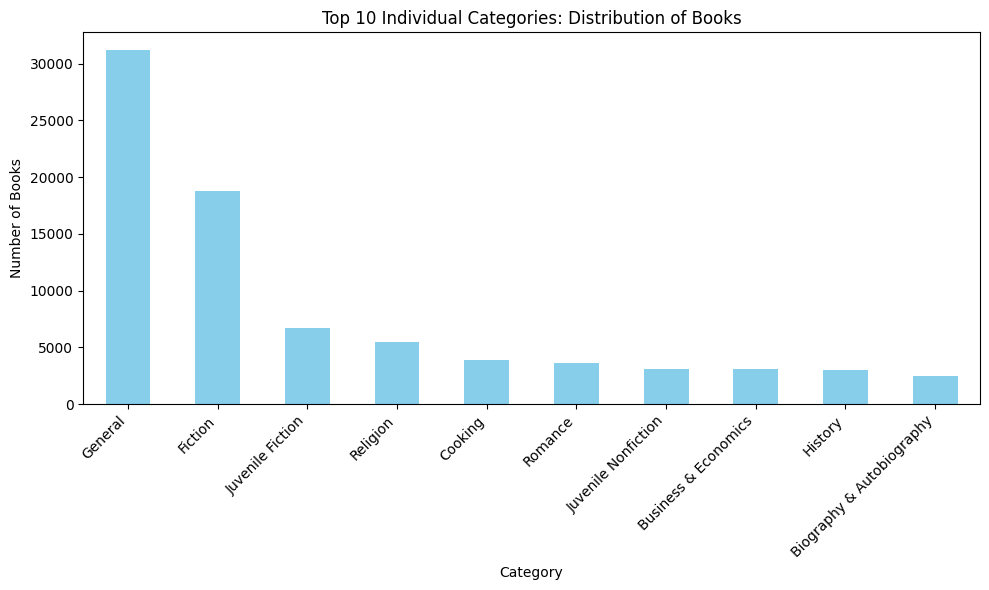

In [ ]:
individual_categories = df['Category'].dropna().str.split(',').explode().str.strip()
top_individual_categories = individual_categories.value_counts().head(10)

plt.figure(figsize=(10, 6))
top_individual_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Individual Categories: Distribution of Books')
plt.xlabel('Category')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Készítsünk statisztikát a szerzők szerint is. Vegyük észre, hogy a szerzők neve egy felsorolás, mely a "By" szóval kezdődik szinte minden esetben. Ezek számát kérdezzük le a következő utasítással

In [ ]:
len(df[df['Authors'].str.match(r'\s*By ')])

102020

Töröljük ki a mező elején lévő "By " részt. Ezt a keresés és csere függvénnyel hajtjuk végre.

In [ ]:
df['Authors'] = df['Authors'].str.replace(r'^\s*By\s*', '', regex=True)

Még ezután marad 1256 könyv, amihez nem tartozik szerző.

In [ ]:
print(f"Books without author: {len(df[df['Authors'].isin(['n/a', 'unknown', ''])])} / {len(df)}")

Books without author: 1256 / 103063


Készítjünk egy statisztikát szerzőnként (igazán szerző kombinációnként) egy átlagos könyvárat a legdrább tízre.

In [ ]:
average_prices_by_author = df.groupby('Authors')['Price Starting With ($)'].mean().sort_values(ascending=False).head(10)
print(average_prices_by_author)

Authors
James, Will                                                              879.500
James Jennings                                                           712.160
Fukase, Masahisa                                                         457.940
Baruch, Hurd                                                             339.790
Ansel Adams                                                              300.000
Thomas Hardy                                                             265.525
Lee, Stan, Kirby, Jack (CON), Ditko, Steve (CON), and Heck, Don (CON)    265.120
Silverstein, Shel                                                        264.700
McDowall, Roddy                                                          236.730
John C. Reeves                                                           221.870
Name: Price Starting With ($), dtype: float64


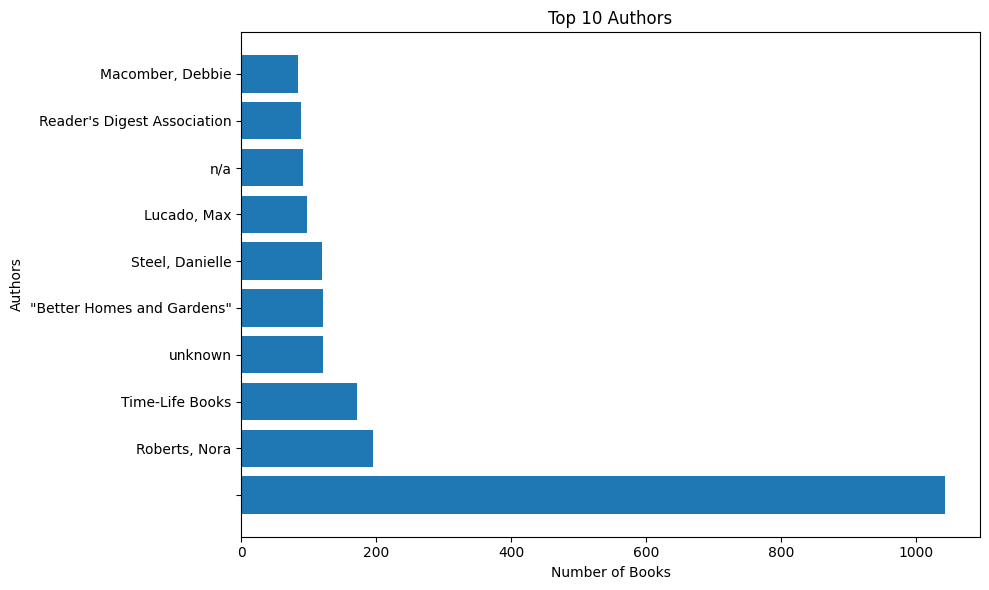

In [ ]:
top_authors = df['Authors'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_authors.index, top_authors.values)
plt.title('Top 10 Authors')
plt.xlabel('Number of Books')
plt.ylabel('Authors')
plt.tight_layout()
plt.show()

A fenti grafikonban a legutolsó, név nélküli elem a legnagyobb, ezek a szerző nélküli könyvek. Vegyük észre, hogy n/a és unknown is szerepel a szerzők között.

Készítsünk egy statisztikát az 1980 után megjelent könyvekre az évenkénti kiadott könyvek számával.

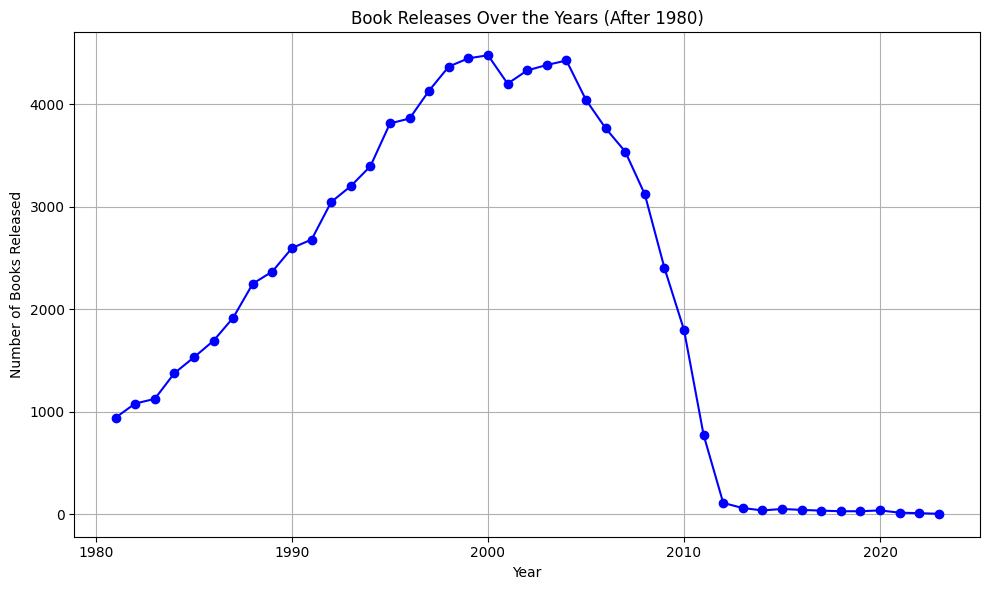

In [ ]:
filtered_years = df[df['Publish Date (Year)'] > 1980]
yearly_counts_after_1980 = filtered_years['Publish Date (Year)'].dropna().value_counts().sort_index()

plt.figure(figsize=(10, 6))
yearly_counts_after_1980.plot(kind='line', marker='o', color='blue')
plt.title('Book Releases Over the Years (After 1980)')
plt.xlabel('Year')
plt.ylabel('Number of Books Released')
plt.grid(True)
plt.tight_layout()
plt.show()

Készítsünk egy listát a kategóriák szerint, ilyet már készítettünk korábban, kicsit másképpen.

In [ ]:
categories = df['Category'].str.split(',', expand=True).stack().str.strip()
#print(categories)
category_counts = categories.value_counts()
top_categories = category_counts.head(12)
print(top_categories)

General                      31202
Fiction                      18766
Juvenile Fiction              6750
Religion                      5478
Cooking                       3930
Romance                       3657
Juvenile Nonfiction           3105
Business & Economics          3075
History                       3052
Biography & Autobiography     2468
Historical                    2459
Mystery & Detective           2425
Name: count, dtype: int64


Gyűjtsük ki az 1980 után kiadott főzéssel kapcsolatos könyveket!

In [ ]:
selection = (df["Publish Date (Year)"] > 1990) & (df["Category"].str.contains("Cooking"))
df[selection][["Title","Publish Date (Year)", "Category"]]

,Title,Publish Date (Year),Category
42,"Eat More, Weigh Less: Dr. Dean Ornish's Life C...",2000,"Cooking , Health & Healing , Low Fat"
47,Healing Benefits of Garlic,1995,"Cooking , Specific Ingredients , Herbs, Spice..."
64,Cook Healthy: Cook Quick,1995,"Cooking , Health & Healing , Low Fat"
112,"Hey Mom! I'm Hungry!: Great-Tasting, Low-Fat, ...",1997,"Cooking , Health & Healing , Low Fat"
155,Big Kitchen Instruction Book,2000,"Cooking , Regional & Ethnic , American , General"
...,...,...,...
102864,The Fresh Pasta Cookbook: International Recipe...,1993,"Cooking , Regional & Ethnic , International"
102878,Outdoor Tables and Tales: Recipes and Food Mem...,1992,"Cooking , Methods , Outdoor"
102971,Lean Italian Cooking,1994,"Cooking , Regional & Ethnic , Italian"
103027,Vegetarian International Cuisine: An Essential...,1997,"Cooking , Vegetarian"
